# Deep Learning Fundamentals - Coursework Final

## Lim Zhao Hong, Student ID: 20065320

### Cats and Dog dataset: https://www.kaggle.com/datasets/erkamk/cat-and-dog-images-dataset

### Import Library

In [1]:
import pandas as pd
import numpy as np
from keras.utils import np_utils
from keras import layers
from keras.models import Sequential
import tensorflow as tf
from PIL import Image
import os
import matplotlib.pyplot as plt
import cv2
import os
import warnings
warnings.filterwarnings("ignore")


### Import Dataset

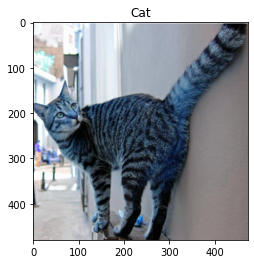

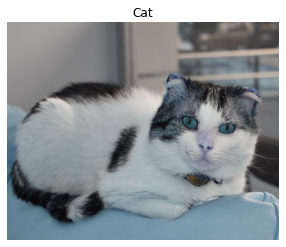

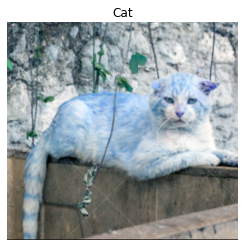

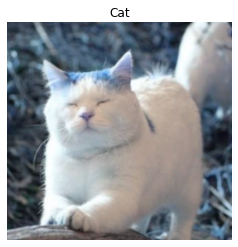

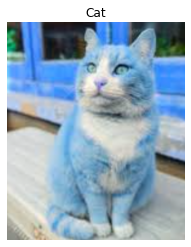

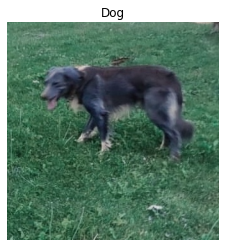

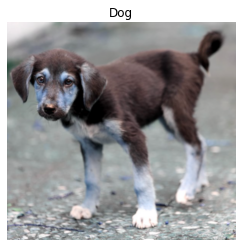

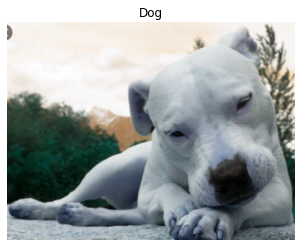

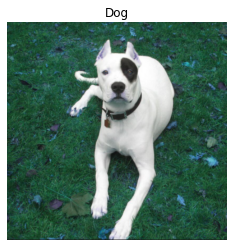

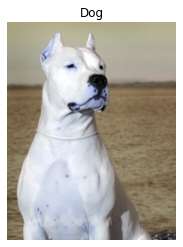

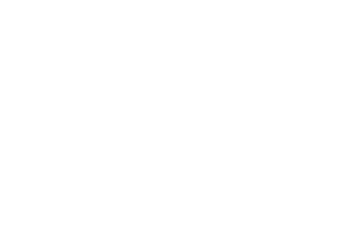

In [2]:
DATADIR = r"C:/Users/Admin/Desktop/Republic Poly/FA1-1-C2349C-A Deep Learning Fundamentals/CWF/Dog and Cat .png/"
CATEGORIES = ["Cat", "Dog"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    i=0
    for img in os.listdir(path):
        img = cv2.imread(os.path.join(path,img))
        plt.imshow(img)
        plt.title(('Cat' if category == "Cat" else 'Dog'))
        plt.show()
        plt.axis("off")
        i+=1
        if i == 5:
            break

### Data Preparation

In [3]:
IMG_SIZE = 180 
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [4]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X.shape)
X = X/255.0  
X = X.reshape(-1,180,180,1)

(1000, 180, 180)


In [5]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y = to_categorical(y, num_classes = 2)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (800, 180, 180, 1)
x_test shape (200, 180, 180, 1)
y_train shape (800, 2)
y_test shape (200, 2)


In [7]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180,180,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 64, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(96, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(2, activation = "softmax"))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 20
batch_size = 40
datagen = ImageDataGenerator(   
        rotation_range=15,
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True) 

In [8]:
datagen.fit(X_train)
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size)   

Epoch 1/20
20/20 [==============================] - 9s 429ms/step - loss: 1.0543 - accuracy: 0.4988 - val_loss: 0.6941 - val_accuracy: 0.4800
Epoch 2/20
20/20 [==============================] - 8s 418ms/step - loss: 0.6944 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.4700
Epoch 3/20
20/20 [==============================] - 8s 420ms/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6931 - val_accuracy: 0.5100
Epoch 4/20
20/20 [==============================] - 8s 420ms/step - loss: 0.6933 - accuracy: 0.5075 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 5/20
20/20 [==============================] - 9s 424ms/step - loss: 0.6937 - accuracy: 0.5050 - val_loss: 0.6933 - val_accuracy: 0.4800
Epoch 6/20
20/20 [==============================] - 9s 429ms/step - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 7/20
20/20 [==============================] - 9s 426ms/step - loss: 0.6932 - accuracy: 0.5038 - val_loss: 0.6931 - val_accuracy: 0.4850
Epoch 

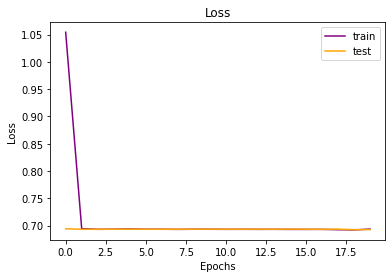

In [12]:
plt.plot(history.history["loss"],c = "purple")
plt.plot(history.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

#### Loss between train and test result show close matching

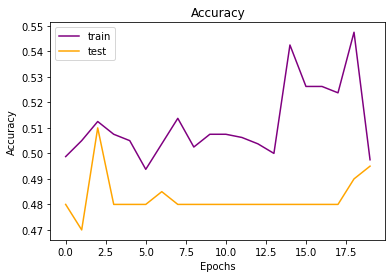

In [13]:
plt.plot(history.history["accuracy"],c = "purple")
plt.plot(history.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

#### Accuracy between train and test result show close matching

## Hyperparameters tuning - Method 1: Change dropout

In [14]:
model = Sequential()
#
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180,180,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1)) ##Change dropout to 0.1

#
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.1)) ##Change dropout to 0.1

#
model.add(Conv2D(filters = 64, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.1)) ##Change dropout to 0.1

# 
model.add(Flatten())
model.add(Dense(96, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(2, activation = "softmax"))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 20
batch_size = 40
datagen = ImageDataGenerator(   
        rotation_range=15,
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True) 

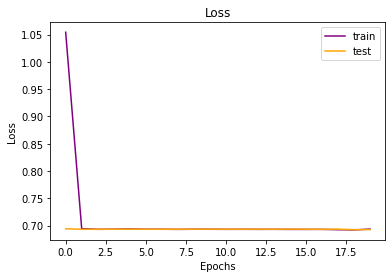

In [10]:
plt.plot(history.history["loss"],c = "purple")
plt.plot(history.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

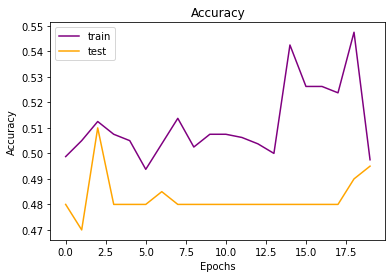

In [11]:
plt.plot(history.history["accuracy"],c = "purple")
plt.plot(history.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

## Data augmentation using ImageDataGenerator (Geometric transformation)

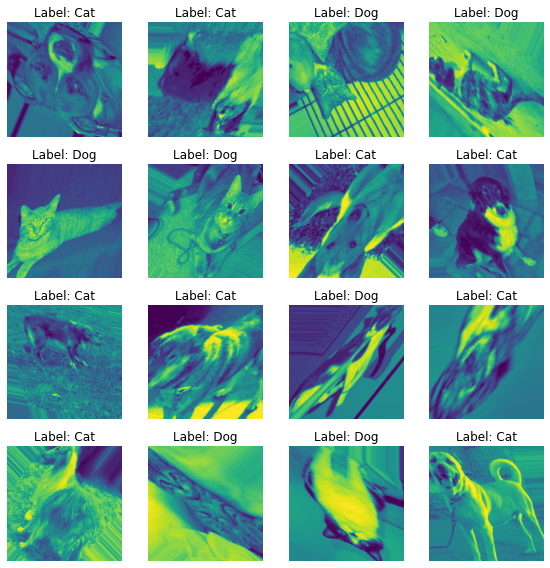

In [20]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras.utils.np_utils as ku

# Initialize the ImageDataGenerator for geometric transformation
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=45,
                             width_shift_range=[-8, 8],
                             height_shift_range=[-8, 8],
                             shear_range=45,
                             zoom_range=[0.75, 1.25],
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.2)

# Convert the labels to one-hot vector
y_train_cat = ku.to_categorical(Y_train)

for batch_x, batch_y in datagen.flow(X_train, y_train_cat, batch_size=16):
    plt.figure(figsize=(8, 8))
    for i in range(16):
        x = batch_x[i]
        y = batch_y[i]
        index = np.argmax(y)
        plt.subplot(4, 4, i+1)
        plt.imshow(x)
        plt.axis('off')
        plt.title('Label: {}'.format(CATEGORIES[index]))
    plt.tight_layout()
    plt.show()
    break

## Data augmentation using ImageDataGenerator (Colour space transformation)

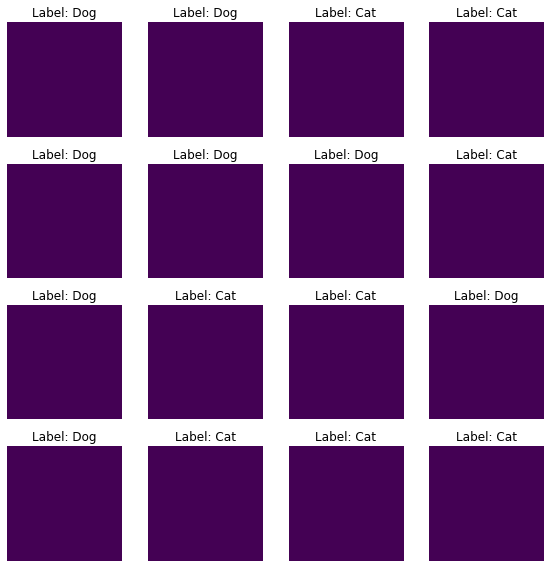

In [22]:
# Initialize the ImageDataGenerator for colour space transformation
datagen = ImageDataGenerator(rescale=1./255,
                             channel_shift_range=0.25,
                             brightness_range=[0.2, 1.2])

for batch_x, batch_y in datagen.flow(X_train, y_train_cat, batch_size=16):
    plt.figure(figsize=(8, 8))
    for i in range(16):
        x = batch_x[i]
        y = batch_y[i]
        index = np.argmax(y)
        plt.subplot(4, 4, i+1)
        plt.imshow(x)
        plt.axis('off')
        plt.title('Label: {}'.format(CATEGORIES[index]))
    plt.tight_layout()
    plt.show()
    break

## Perform a prediction

In [16]:
result = model.predict(X_val)
#result = y_scaler.inverse_transform(result)
print(result)

7/7 [==============================] - 0s 55ms/step
[[0.4956105  0.50438946]
 [0.48411062 0.5158894 ]
 [0.45499784 0.54500216]
 [0.6726007  0.3273993 ]
 [0.71969366 0.28030634]
 [0.47990742 0.5200926 ]
 [0.57930464 0.42069533]
 [0.43301672 0.5669833 ]
 [0.5557725  0.4442275 ]
 [0.29287353 0.70712644]
 [0.4433009  0.5566991 ]
 [0.5373557  0.46264428]
 [0.43347132 0.5665287 ]
 [0.5596068  0.44039324]
 [0.5464094  0.4535906 ]
 [0.60119426 0.39880577]
 [0.45661545 0.5433845 ]
 [0.528844   0.47115606]
 [0.52492416 0.4750759 ]
 [0.47143212 0.52856785]
 [0.5016589  0.4983411 ]
 [0.5933281  0.40667182]
 [0.67293304 0.3270669 ]
 [0.7118273  0.28817275]
 [0.7952321  0.20476781]
 [0.57627857 0.4237215 ]
 [0.6861006  0.31389946]
 [0.55842656 0.44157344]
 [0.22763704 0.77236295]
 [0.59733534 0.40266463]
 [0.67460996 0.3253901 ]
 [0.5407651  0.45923486]
 [0.7294241  0.2705759 ]
 [0.56670976 0.4332903 ]
 [0.63482165 0.3651784 ]
 [0.50169915 0.49830088]
 [0.5193524  0.48064765]
 [0.5711396  0.42886043

# Ignore below

In [14]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = ('https://github.com/sartajbhuvaji/brain-tumor-classification-dataset','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
      
    
for i in labels:
    folderPath = os.path.join('https://github.com/sartajbhuvaji/brain-tumor-classification-dataset','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

NameError: name 'tqdm' is not defined

In [10]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)

    brain_folder_list = listdir(f"{directory_root}/")
    print(brain_folder_list)
    for brain_folder in brain_folder_list:
        print(f"[INFO] Processing {brain_folder} ...")
        brain_image_list = listdir(f"{directory_root}/{brain_folder}/")

        for image in brain_image_list[:500]:
            image_directory = f"{directory_root}/{brain_folder}/{image}"
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(brain_folder)            
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
Error : [WinError 3] The system cannot find the path specified: '../input/brain-tumor-classification-mri/Training'


In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
print(train_labels)

[5 0 4 ... 5 6 8]


Display the shape of data

In [3]:
print("Train images shape: {}".format(train_images.shape))
print("Train labels shape: {}".format(train_labels.shape))
print("Test images shape: {}".format(test_images.shape))
print("Test labels shape: {}".format(test_labels.shape))

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


## 3.2 Display some of the images from the MNIST dataset

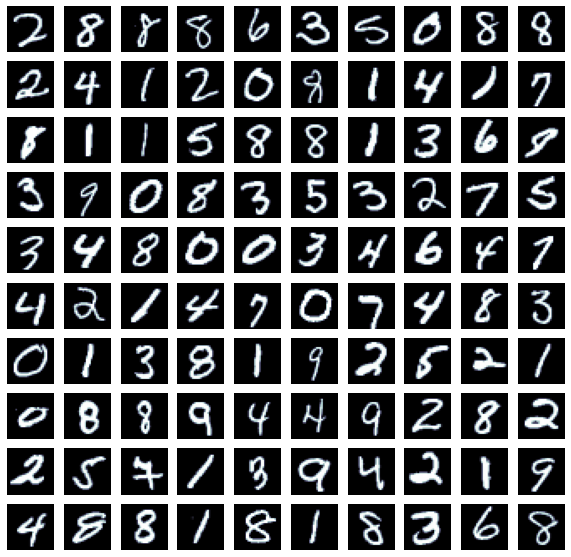

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import random


# >>>> this section of code will start with a random value and retrieve continuous of 100 images
#starting = random.randint(0, 59900)
#pos = 1
#for i in range(starting, starting+100):
#    tmp_img = train_images[i]
#    plt.subplot(10,10,pos)
#    pos += 1
#    plt.imshow(tmp_img, cmap= 'gray')
#plt.xlabel("Image id "+str(starting)+" to "+str(starting+100))
# <<<<<<<<<<<<<<<<<<<<<<<<<

# >>>>>>>>> below is an example of randmoize display of images out of the 60000 training images
i, pos = 0, 1
trgSize = len(train_images)
plt.figure(figsize=(10, 10))
for i in range(0, 100):
    rnd = random.randint(0, trgSize)
    tmp_img = train_images[rnd]
    
    #subplot params: 3-digit integer or three separate integers describing the position of the subplot.
    #nrows, ncols, and index in order, the subplot will take the index position on a grid with 
    #nrows rows and ncols columns. index starts at 1 in the upper left corner and increases to the right.
    plt.subplot(10,10,pos)
    pos += 1
    plt.imshow(tmp_img, cmap= 'bone')
    plt.axis('off')
# <<<<<<<<<<<<<< ends here
plt.show()

## 3.3 Display some images with labels

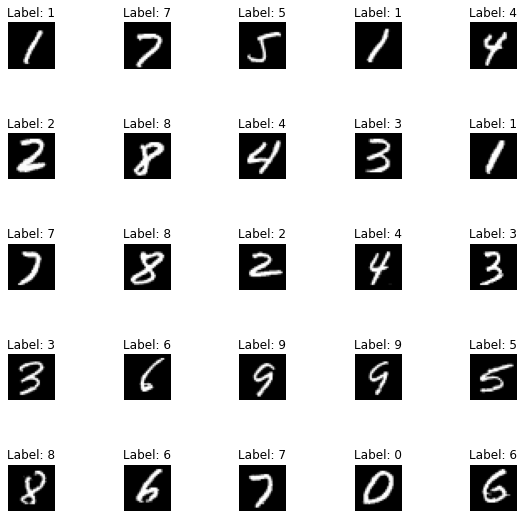

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

pos = 1
starting = random.randint(0, 59975)
plt.figure(figsize=(10, 10))
for i in range(starting, starting+25):
    tmp_img = train_images[i]
    ax = plt.subplot(5*2,5,pos)
    
    if pos%5 == 0:
        pos += 6
    else:
        pos += 1
        
    ax.imshow(tmp_img, cmap= 'gray')
    ax.axis('off')
    ax.set_title("Label: "+str(train_labels[i]))
    ax.label_outer()
    
plt.xlabel("Image id "+str(starting)+" to "+str(starting+25))
plt.show()

## 3.4 Process the images and labels

In [6]:
from keras.utils.np_utils import to_categorical

# Flatten the image
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))


# One-hot Encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("Train images shape: {}".format(train_images.shape))
print("Train labels shape: {}".format(train_labels.shape))
print("Test images shape: {}".format(test_images.shape))
print("Test labels shape: {}".format(test_labels.shape))

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)


## 3.5 Save the processed MNIST data for later use

In [7]:
import pickle

data = [train_images, train_labels, test_images, test_labels]

# Save in local drive
with open('MNIST_data.pickle', 'wb+') as out_file:
    pickle.dump(data, out_file)